In [8]:
# ----- Core Python & Visualization ----- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Data Preprocessing ----- #
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# ----- Models ----- #
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# ----- Evaluation Metrics ----- #
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score

# ----- Neural Network (Keras) ----- #
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

Questions:
- Can you predict passenger satisfaction?
- What factors are associated with passenger satisfaction?

In [9]:
data1 = pd.read_csv("/Users/anhuynh/Downloads/data1.csv")
#data = df.dropna()

data1

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [10]:
data2 = pd.read_csv("/Users/anhuynh/Downloads/data2.csv")
#data = df.dropna()

data2

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [11]:
import pandas as pd

merged_data = pd.concat([data1, data2], ignore_index=True)
merged_data = merged_data.dropna()


In [12]:
# Dataset Overview
print("🧠 Shape of merged data:", merged_data.shape)

# Columns and Data Types
print("\n📋 Column names:\n", merged_data.columns.tolist())
print("\n🔎 Data types:\n", merged_data.dtypes)

# Preview
print("\n🧾 First 5 rows:\n", merged_data.head())

# Missing Data
print("\n🧹 Missing values per column:\n", merged_data.isnull().sum())

# Descriptive Stats for Numeric Columns
print("\n📊 Summary stats (numeric):\n", merged_data.describe())

# Descriptive Stats for Categorical Columns
print("\n🧩 Summary stats (categorical):\n", merged_data.describe(include=['object', 'category']))

# Unique Values Per Column
print("\n🔢 Unique values per column:")
for col in merged_data.columns:
    print(f"  - {col}: {merged_data[col].nunique()} unique values")

# Duplicate Check
print("\n📎 Number of duplicate rows:", merged_data.duplicated().sum())

# Total number of missing values
total_na = merged_data.isna().sum().sum()
print("🧮 Total number of missing values in merged_data:", total_na)



🧠 Shape of merged data: (129487, 25)

📋 Column names:
 ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

🔎 Data types:
 Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease o

In [13]:
# Check class distribution
class_counts = merged_data['satisfaction'].value_counts()
class_percentages = merged_data['satisfaction'].value_counts(normalize=True) * 100

# Display counts and percentages
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)


Class Counts:
satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

Class Percentages:
satisfaction
neutral or dissatisfied    56.550078
satisfied                  43.449922
Name: proportion, dtype: float64


In [42]:
# Loop through each column and print value counts and percentages (for categorical columns)
for col in merged_data.columns:
    if merged_data[col].dtype == 'object' or merged_data[col].nunique() < 20:  # Adjust the threshold if needed
        print(f"\n--- {col} ---")
        counts = merged_data[col].value_counts()
        percentages = merged_data[col].value_counts(normalize=True) * 100
        print("Counts:\n", counts)
        print("Percentages (%):\n", percentages.round(2))



--- Gender ---
Counts:
 Gender
Female    65703
Male      63784
Name: count, dtype: int64
Percentages (%):
 Gender
Female    50.74
Male      49.26
Name: proportion, dtype: float64

--- Customer Type ---
Counts:
 Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Percentages (%):
 Customer Type
Loyal Customer       81.69
disloyal Customer    18.31
Name: proportion, dtype: float64

--- Type of Travel ---
Counts:
 Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Percentages (%):
 Type of Travel
Business travel    69.08
Personal Travel    30.92
Name: proportion, dtype: float64

--- Class ---
Counts:
 Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64
Percentages (%):
 Class
Business    47.87
Eco         44.88
Eco Plus     7.24
Name: proportion, dtype: float64

--- Inflight wifi service ---
Counts:
 Inflight wifi service
2    32236
3    32087
4    24702
1    22250
5    1

Dataset Imbalance Observations
The target variable, satisfaction, exhibits a moderate class imbalance, with 56.55% of passengers classified as neutral or dissatisfied and 43.45% as satisfied. While not extreme, this disparity may introduce bias into the model by favoring the majority class during training.

Several predictor variables also display notable imbalances. For instance:

Customer Type is skewed, with 81.69% of passengers identified as Loyal Customers compared to only *18.31% identified as Disloyal Customers.

In the Class variable, the majority of passengers traveled in Business or Economy class (approximately 93% combined), whereas only 7.24% traveled in Eco Plus.

Ratings-related variables, such as Online Boarding and Seat Comfort, are also heavily concentrated in higher ratings (4 and 5), with very few responses in the lower range (0 or 1), indicating potential skewness in passenger feedback.

These imbalances should be considered during model development, as they may impact predictive performance and generalizability.

Data Visualization

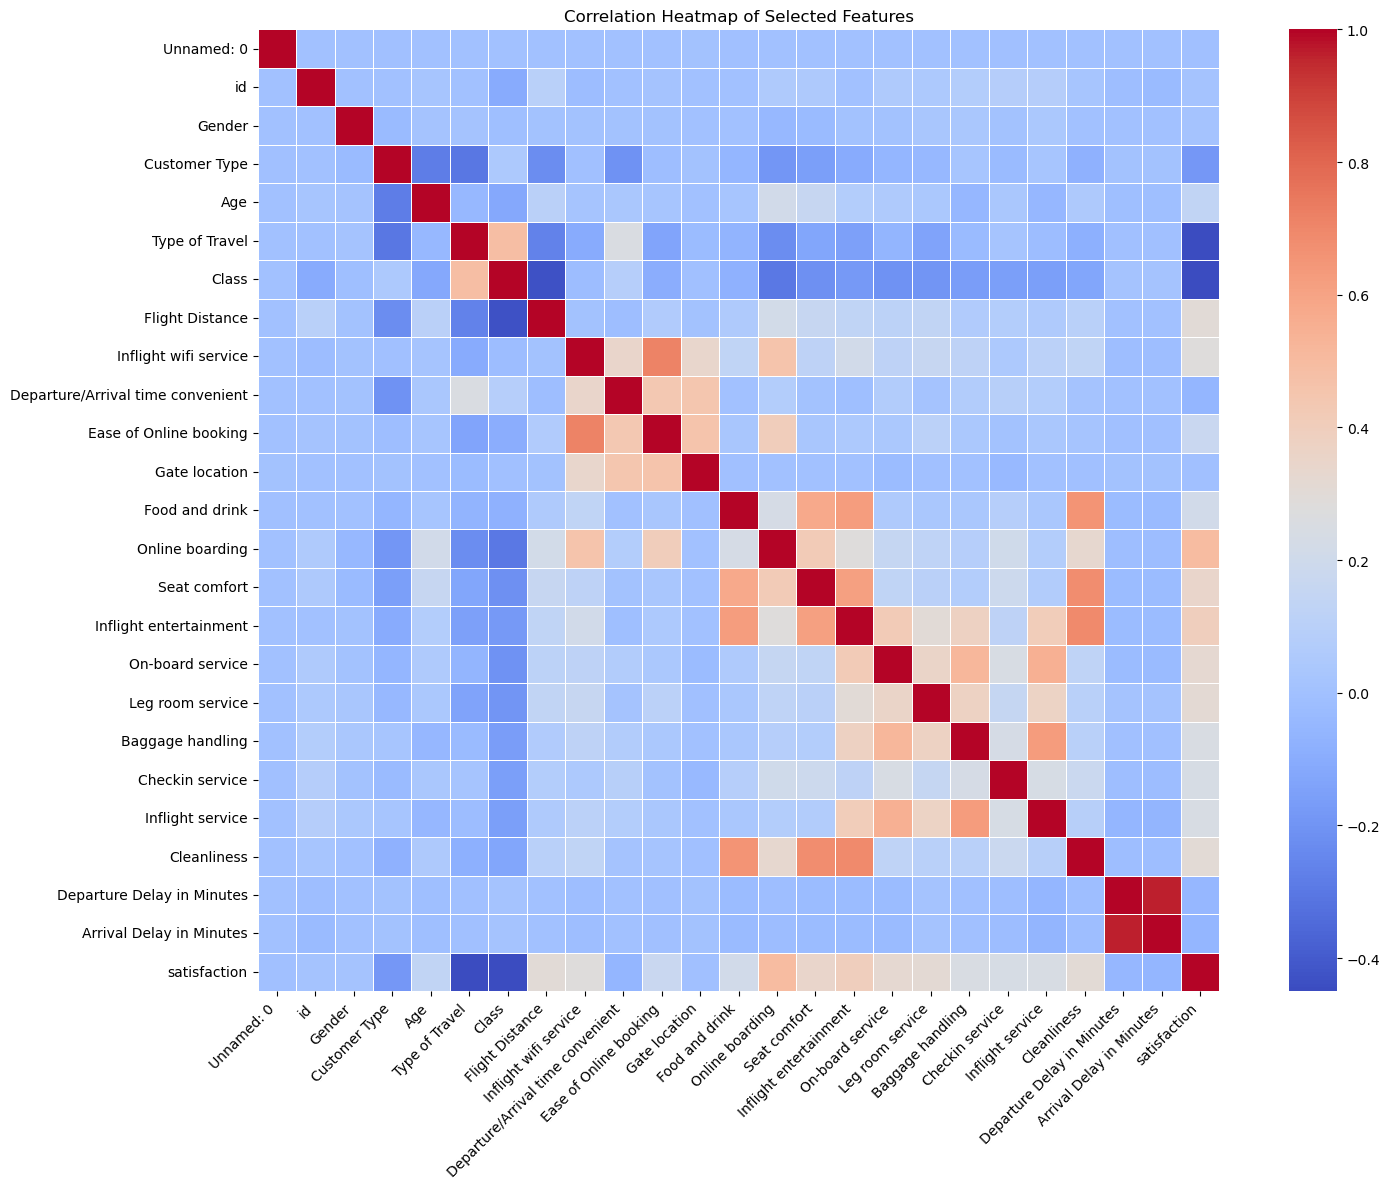

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# List of columns
cols = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
        'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
        'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
        'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

# Subset the dataframe
data = merged_data[cols].copy()

# Encode categorical variables
label_encodable = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_encodable:
    data[col] = le.fit_transform(data[col])

# Compute correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This shows might be potential correlations between online boarding, inflight entertainment, and other potential variables. Now let dive deeper into each of the variables plots. 

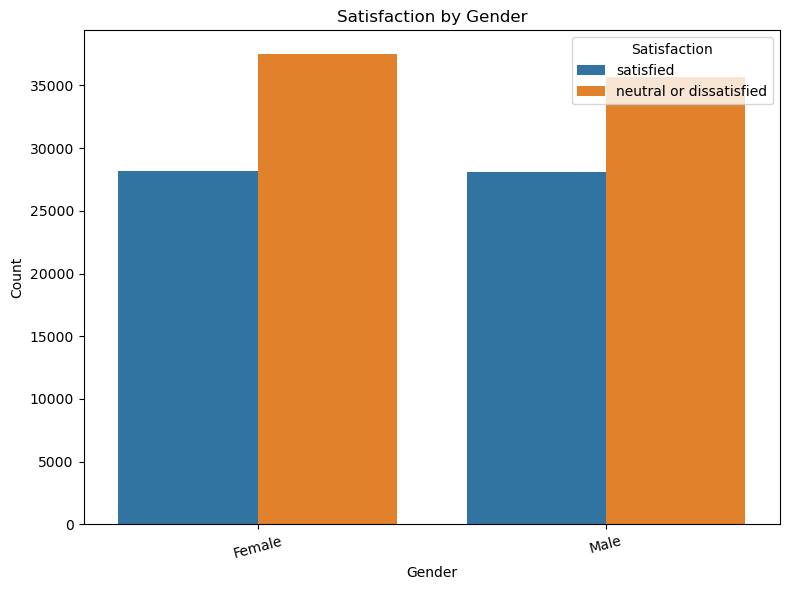

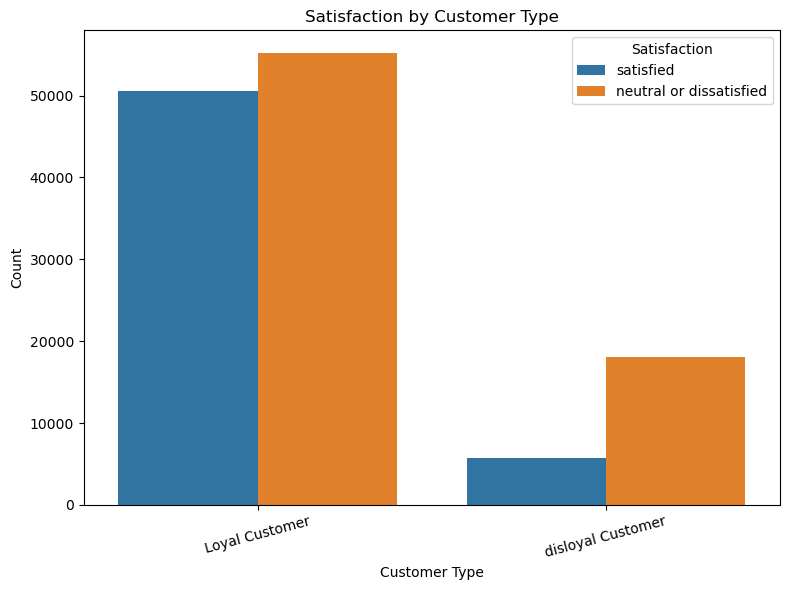

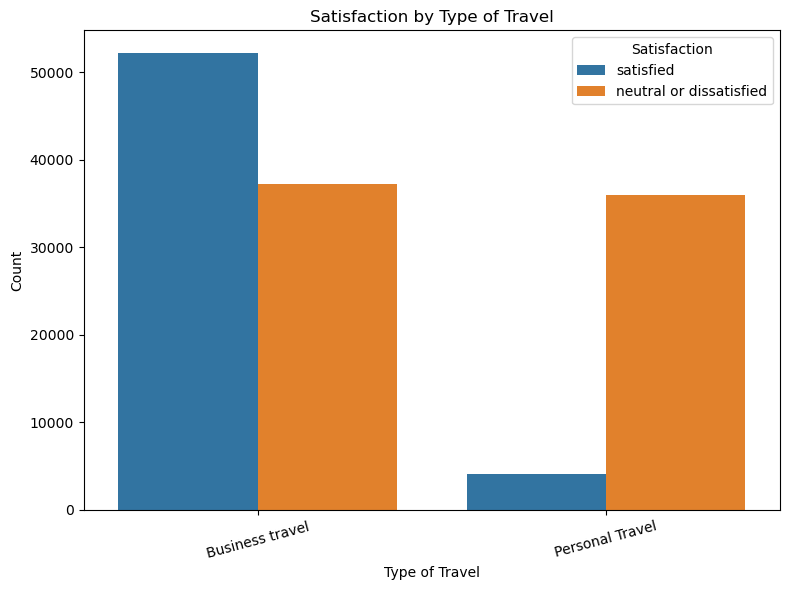

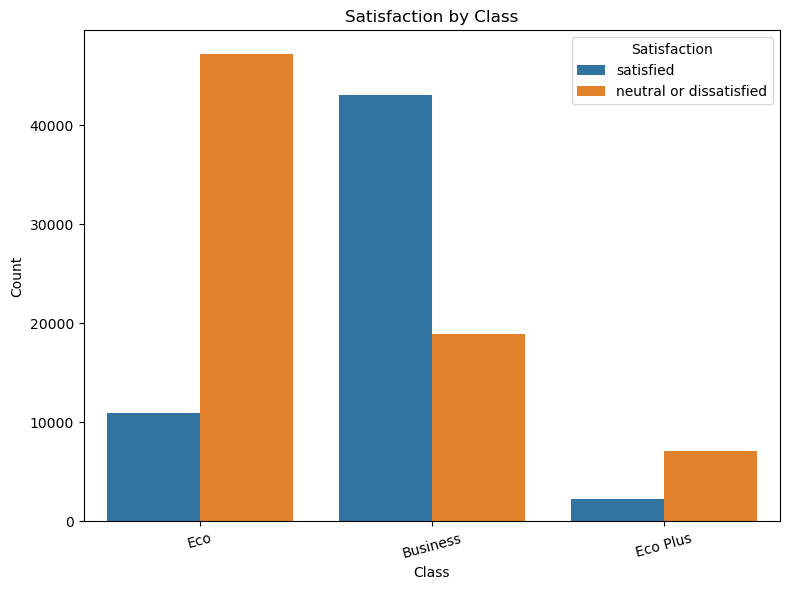

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


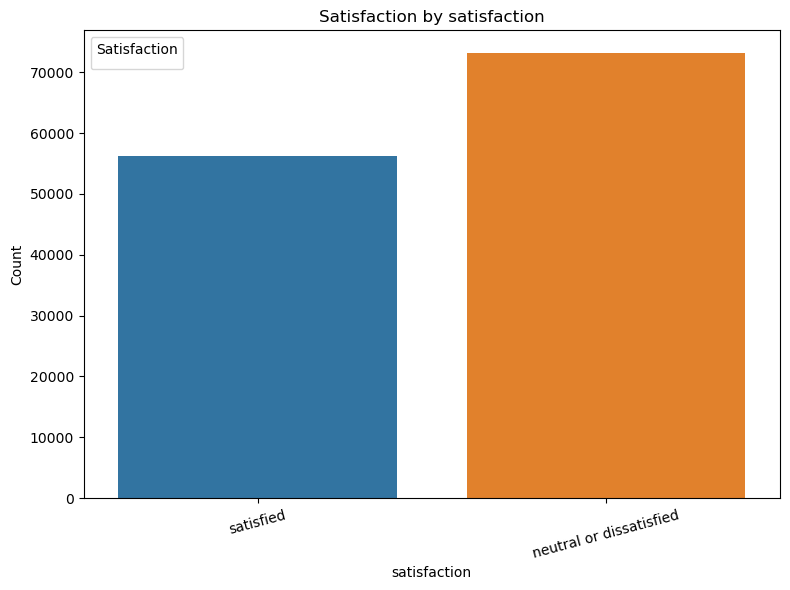

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of columns
cols = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
        'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
        'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
        'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

# Filter for categorical columns only
categorical_cols = merged_data[cols].select_dtypes(include='object').columns.tolist()

# Create countplots for each categorical column vs satisfaction
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=merged_data, x=col, hue='satisfaction')
    plt.title(f'Satisfaction by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


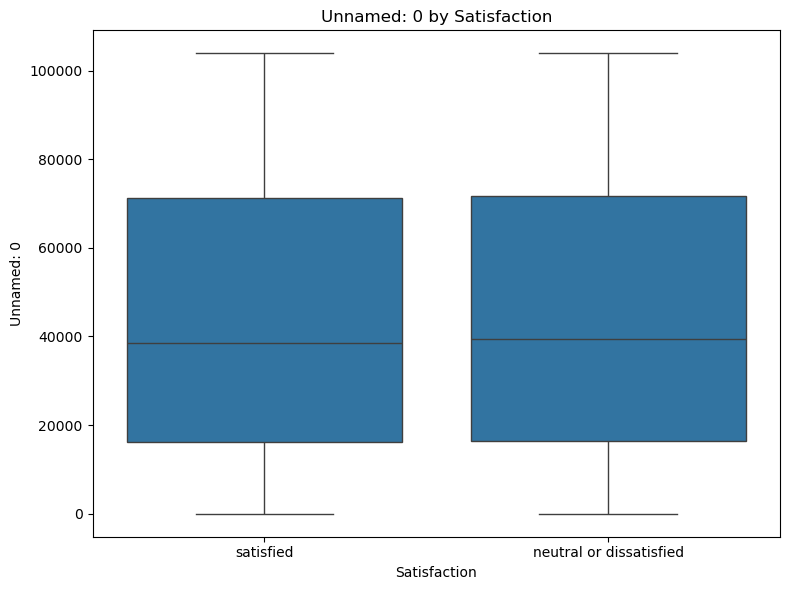

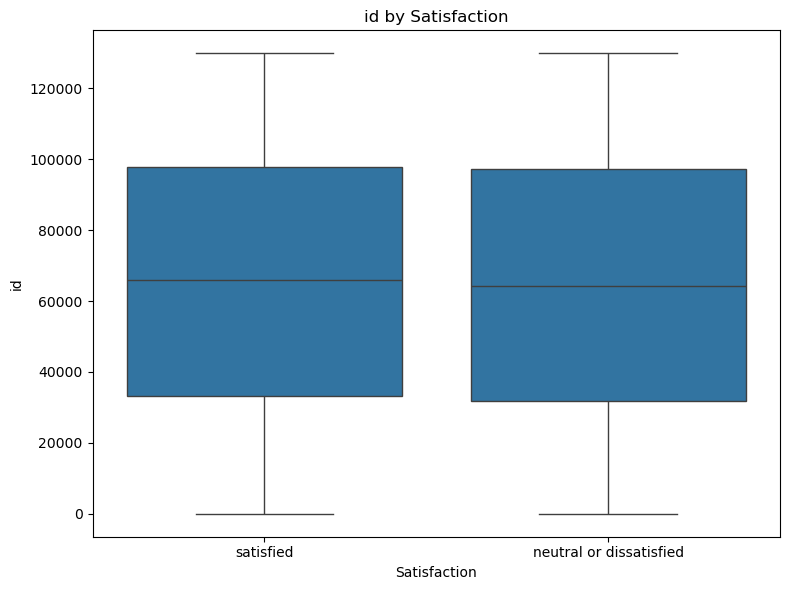

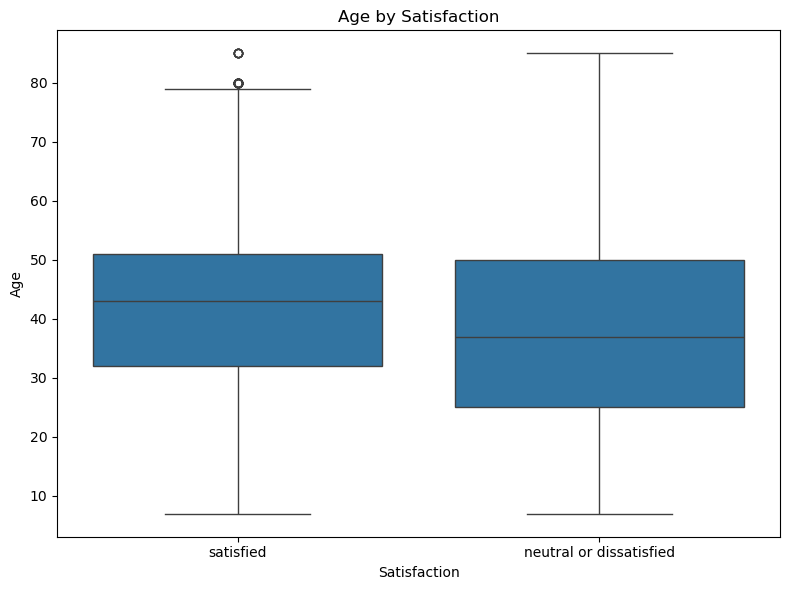

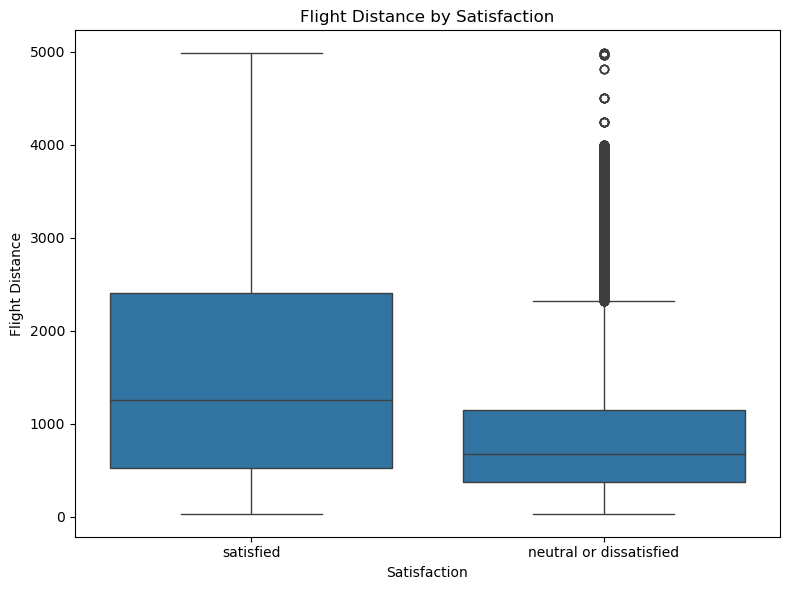

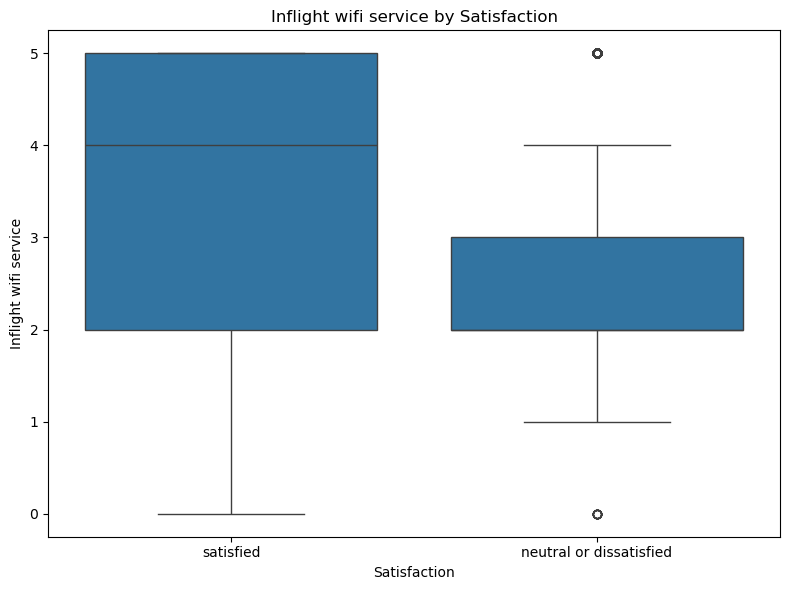

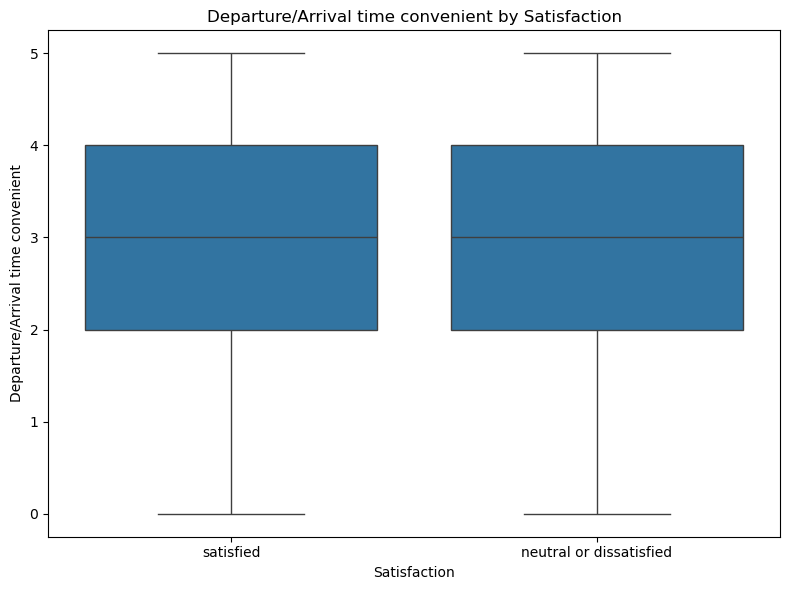

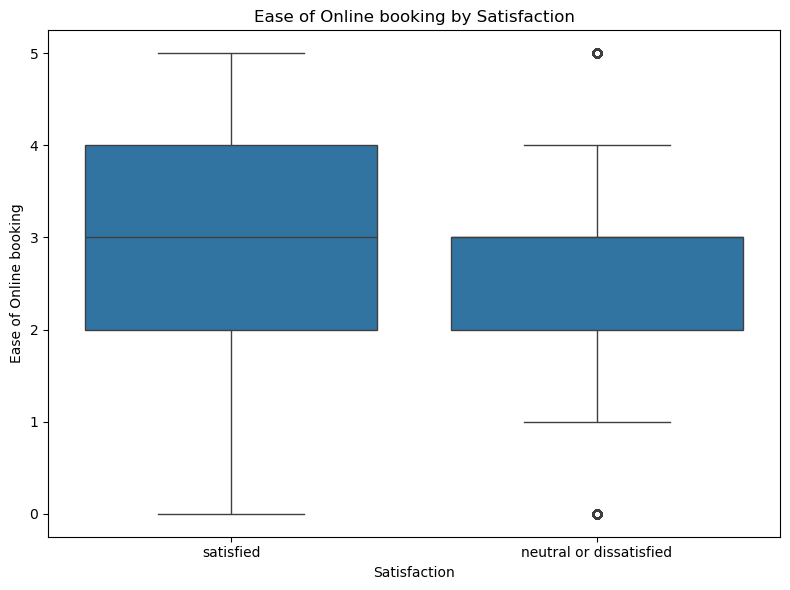

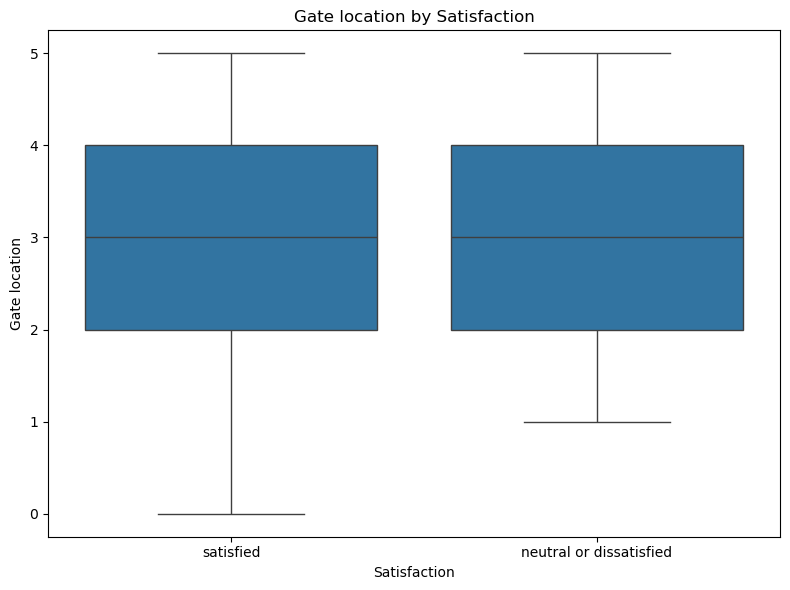

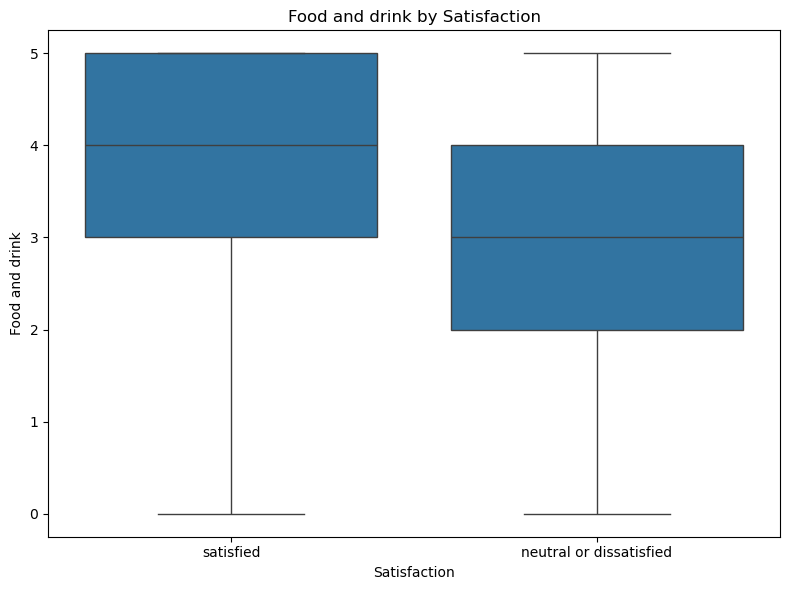

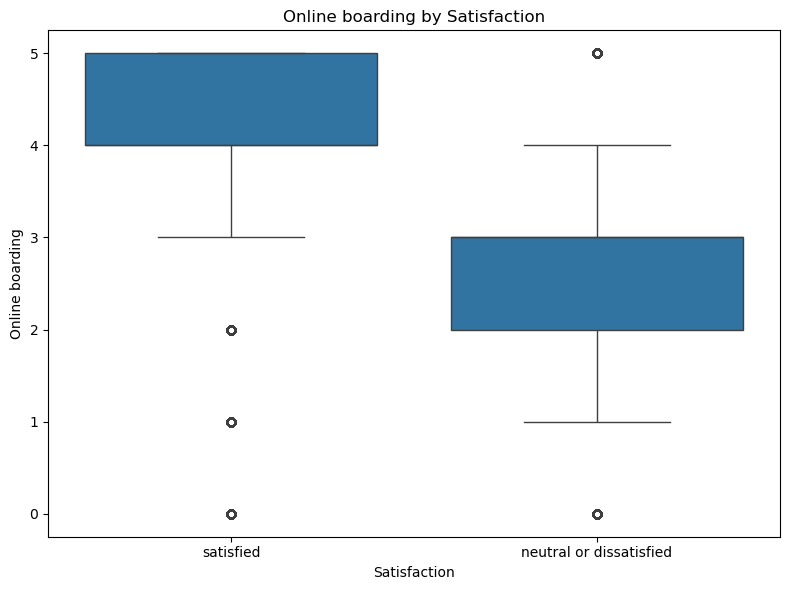

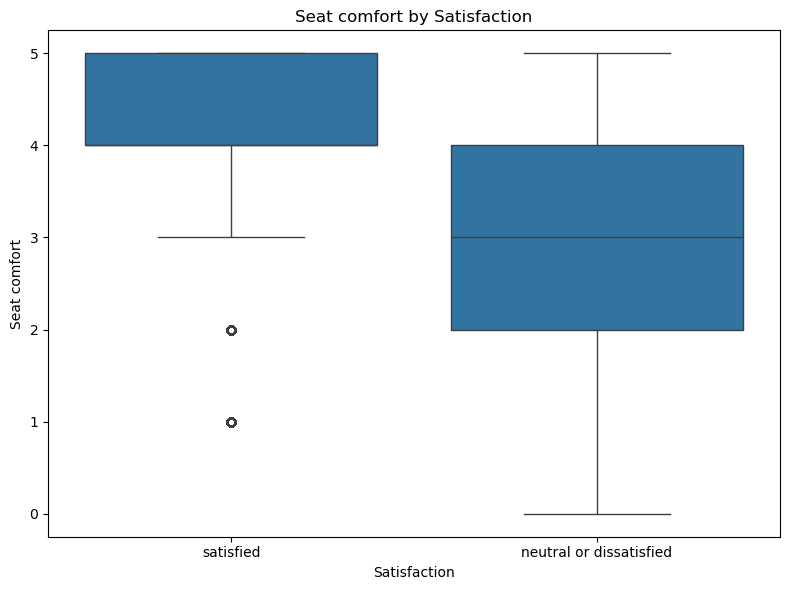

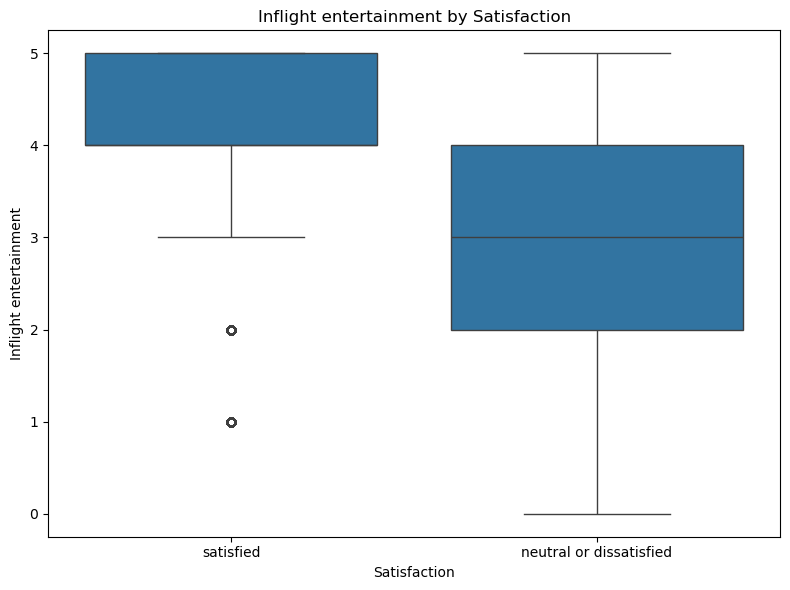

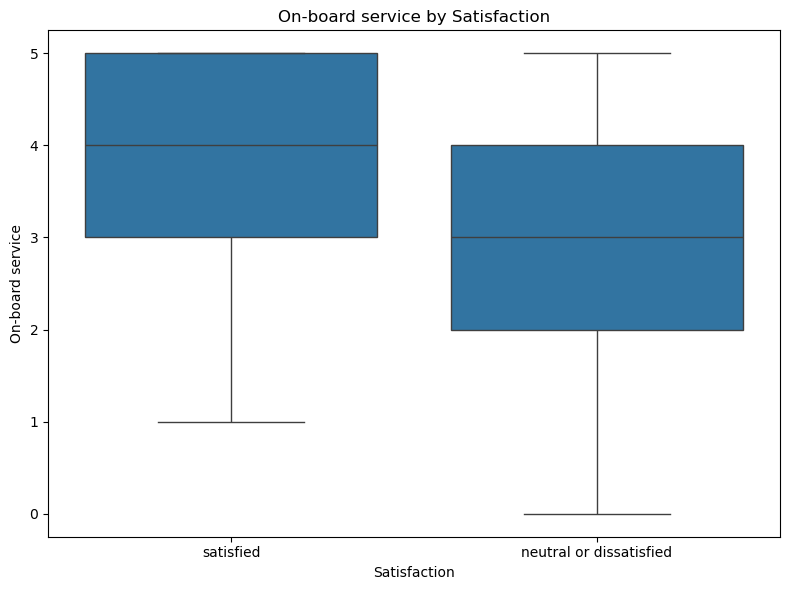

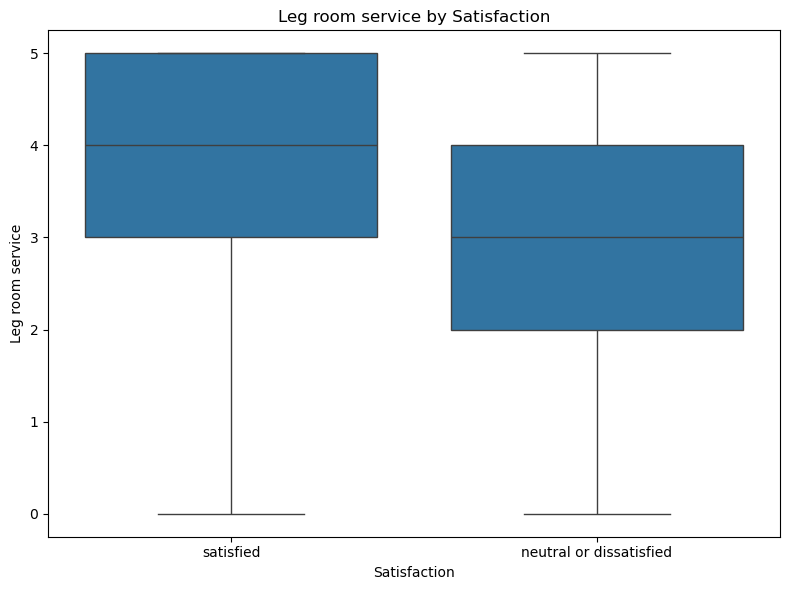

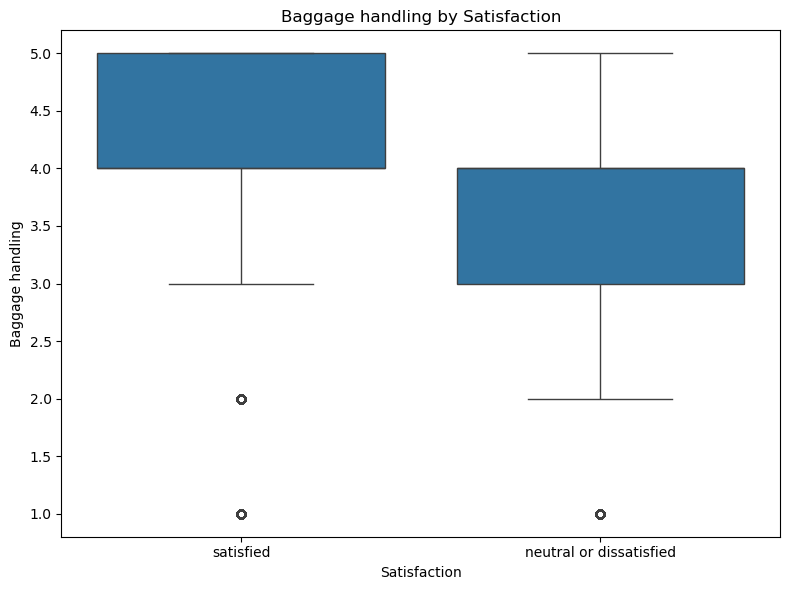

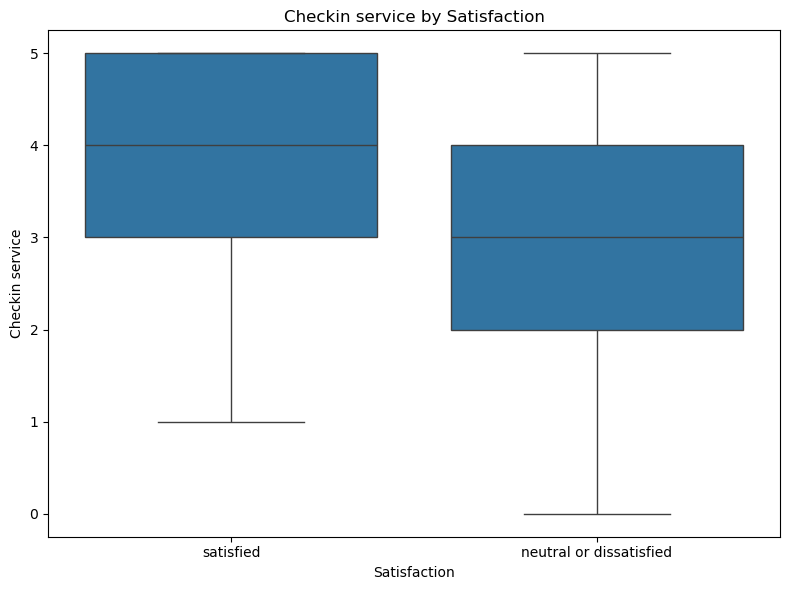

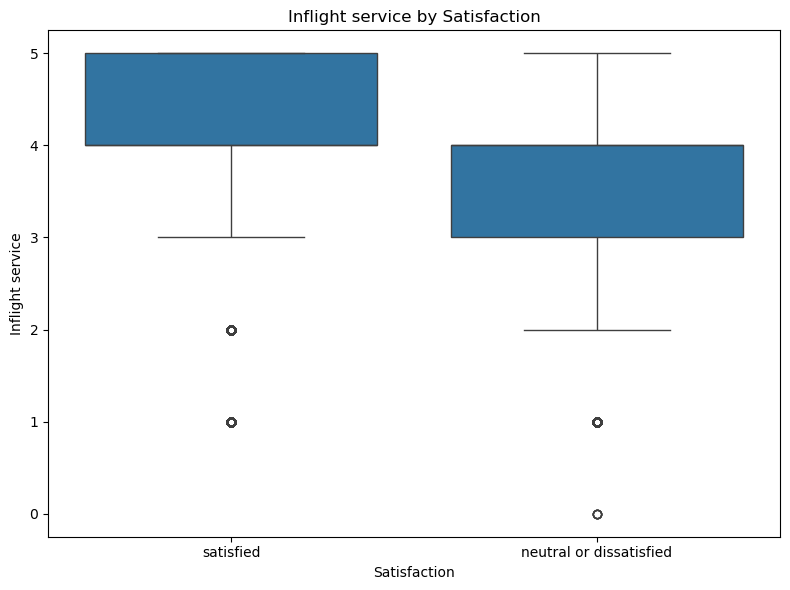

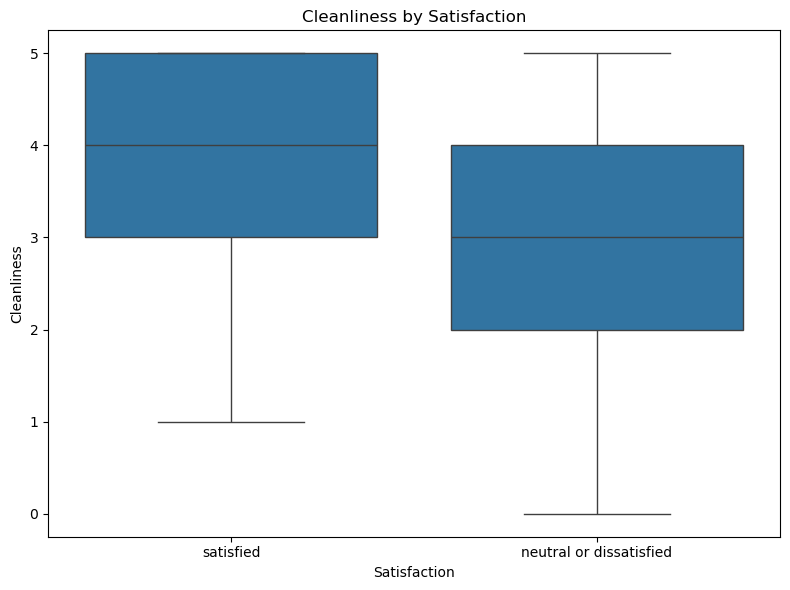

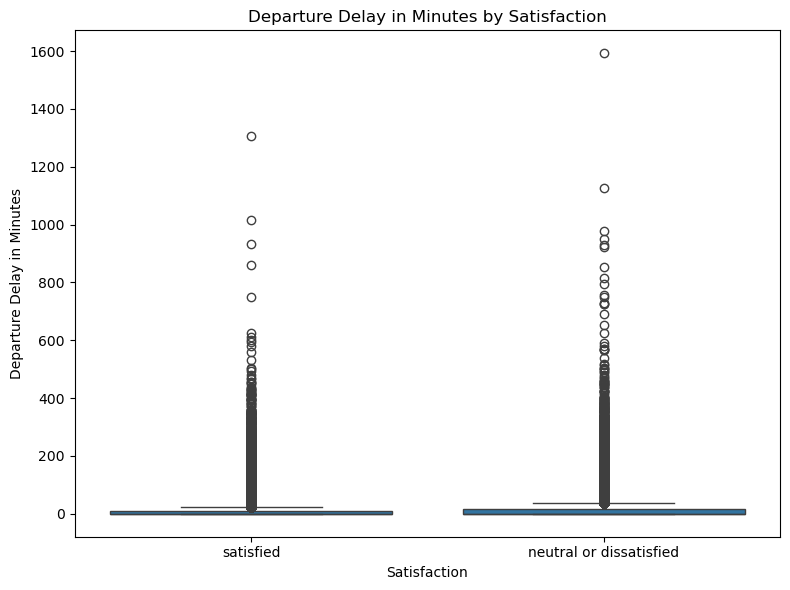

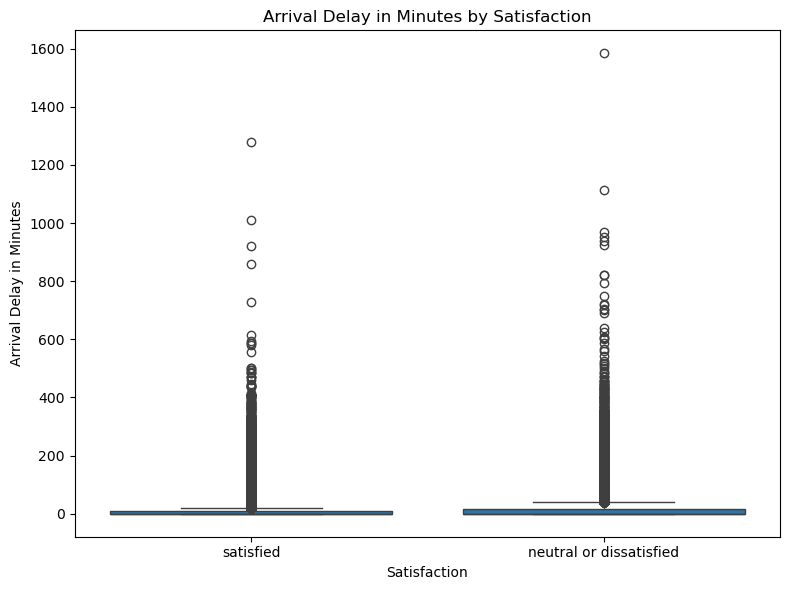

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the full list of columns
cols = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
        'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
        'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
        'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
        'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

# Split categorical and numeric columns
numeric_cols = merged_data[cols].select_dtypes(include=['int64', 'float64']).columns.tolist()


# 🔹 Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=merged_data, x='satisfaction', y=col)
    plt.title(f'{col} by Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Based on the dataset, several patterns emerge regarding customer satisfaction. Disloyal customers are significantly more likely to rate the airline as "neutral or dissatisfied," suggesting that loyalty plays a key role in shaping overall sentiment. Similarly, personal travelers tend to report lower satisfaction compared to business travelers, who consistently show higher satisfaction levels—particularly those flying in business class. Additionally, service-related factors such as online boarding, seat comfort, and baggage handling appear to strongly influence satisfaction. Poor ratings in these areas are commonly associated with lower overall satisfaction, highlighting the importance of a smooth and comfortable travel experience in shaping positive customer perceptions.

Model Structuring 

In [17]:
# Now you can split and preprocess!
X = merged_data.drop(columns=['satisfaction'])
y = merged_data['satisfaction']


categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# ---- (2) Train/test split BEFORE preprocessing ---- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- (3) Define Preprocessor ---- #
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression
Accuracy: 0.8721909027724148
Confusion Matrix:
 [[13093  1363]
 [ 1947  9495]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.91      0.89     14456
              satisfied       0.87      0.83      0.85     11442

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87     25898



In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Define Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 2. Build Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

# 3. Fit
dt_pipeline.fit(X_train, y_train)

# 4. Predict
y_pred_dt = dt_pipeline.predict(X_test)

# 5. Evaluate
print("Accuracy of the Decision Tree model:", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix of the Decision Tree model:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification report of the Decision Tree model:\n", classification_report(y_test, y_pred_dt))


Accuracy of the Decision Tree model: 0.9060545215846784
Confusion matrix of the Decision Tree model:
 [[13433  1023]
 [ 1410 10032]]

Classification report of the Decision Tree model:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.93      0.92     14456
              satisfied       0.91      0.88      0.89     11442

               accuracy                           0.91     25898
              macro avg       0.91      0.90      0.90     25898
           weighted avg       0.91      0.91      0.91     25898



In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.9641671171519036
Confusion Matrix:
 [[14184   272]
 [  656 10786]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14456
              satisfied       0.98      0.94      0.96     11442

               accuracy                           0.96     25898
              macro avg       0.97      0.96      0.96     25898
           weighted avg       0.96      0.96      0.96     25898



In [21]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode the labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Define XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Fit the model
xgb_pipeline.fit(X_train, y_train_enc)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)

# Decode predictions
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluation
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))





/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.9652096687002857
Confusion Matrix:
 [[14145   311]
 [  590 10852]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14456
              satisfied       0.97      0.95      0.96     11442

               accuracy                           0.97     25898
              macro avg       0.97      0.96      0.96     25898
           weighted avg       0.97      0.97      0.97     25898



In [22]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Define Bagging pipeline using updated parameter name
bagging_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(
        estimator=XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss'),
        n_estimators=10,
        random_state=42,
        n_jobs=-1
    ))
])

# Fit and predict
bagging_pipeline.fit(X_train, y_train_enc)
y_pred_bag = bagging_pipeline.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_bag)

# Evaluation
print("Bagging with XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Bagging with XGBoost
Accuracy: 0.9655957989033902
Confusion Matrix:
 [[14191   265]
 [  626 10816]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14456
              satisfied       0.98      0.95      0.96     11442

               accuracy                           0.97     25898
              macro avg       0.97      0.96      0.97     25898
           weighted avg       0.97      0.97      0.97     25898



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define linear classifiers
linear_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVM (LinearSVC)': LinearSVC(max_iter=1000, random_state=42),
    'SGD Classifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
}

# Loop through and test each linear model
for name, model in linear_models.items():
    print(f"\n🔍 Testing {name}...")
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Assume already defined
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Testing Logistic Regression...
✅ Accuracy: 0.8722
🧮 Confusion Matrix:
 [[13093  1363]
 [ 1947  9495]]
📊 Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.91      0.89     14456
              satisfied       0.87      0.83      0.85     11442

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87     25898


🔍 Testing Linear SVM (LinearSVC)...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.8727
🧮 Confusion Matrix:
 [[13103  1353]
 [ 1945  9497]]
📊 Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.91      0.89     14456
              satisfied       0.88      0.83      0.85     11442

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87     25898


🔍 Testing SGD Classifier...
✅ Accuracy: 0.8689
🧮 Confusion Matrix:
 [[12810  1646]
 [ 1750  9692]]
📊 Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.89      0.88     14456
              satisfied       0.85      0.85      0.85     11442

               accuracy                           0.87     25898
              macro avg       0.87      0.87      0.87     25898
           weighted avg       0.87      0.87      0.87   

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode the labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=100, random_state=42))
]

# Use XGBoost as the final estimator (meta-model)
final_estimator = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    passthrough=True,  # optional, includes original features for final estimator
    n_jobs=-1
)

# Create pipeline
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

# Fit the pipeline
stacking_pipeline.fit(X_train, y_train_enc)

# Predict
y_pred_stack = stacking_pipeline.predict(X_test)

# Decode predictions
y_pred_labels = label_encoder.inverse_transform(y_pred_stack)

# Evaluation
print("Stacking Classifier with XGBoost Final Estimator")
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:01:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier with XGBoost Final Estimator
Accuracy: 0.9664452853502201
Confusion Matrix:
 [[14160   296]
 [  573 10869]]
Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14456
              satisfied       0.97      0.95      0.96     11442

               accuracy                           0.97     25898
              macro avg       0.97      0.96      0.97     25898
           weighted avg       0.97      0.97      0.97     25898



In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Define pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1, 0.3],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train_enc)

# Best estimator prediction
y_pred_xgb = grid_search.best_estimator_.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluation
print("📌 Tuned XGBoost Results")
print("✅ Best Parameters:", grid_search.best_params_)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred_labels))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_labels))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

📌 Tuned XGBoost Results
✅ Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
🎯 Accuracy: 0.965827477025253
🧮 Confusion Matrix:
 [[14179   277]
 [  608 10834]]
📊 Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14456
              satisfied       0.98      0.95      0.96     11442

               accuracy                           0.97     25898
              macro avg       0.97      0.96      0.97     25898
           weighted avg       0.97      0.97      0.97     25898



I experimented with various hyperparameter combinations to improve model performance, with a focus on increasing the recall rate for neutral or dissatisfied passengers. The goal was to ensure the model could accurately identify those who had a less favorable experience. After tuning, the most effective parameters were:

✅ Best Parameters:

colsample_bytree: 0.8

learning_rate: 0.1

max_depth: 7

n_estimators: 200

subsample: 1.0

These settings helped the model strike a good balance between complexity and generalization. The final tuned XGBoost model achieved an accuracy of 96.58%, and more importantly, a recall of 98% for the “neutral or dissatisfied” group, showing that the model is highly effective at flagging passengers who are less satisfied.

My XGBoost model performed the best on this data, let's pull the feature importance chart to see what variables are influencing airline passenger satisfaction!

Features Importance - Important Factors that are Associated with Passenger Satisfaction

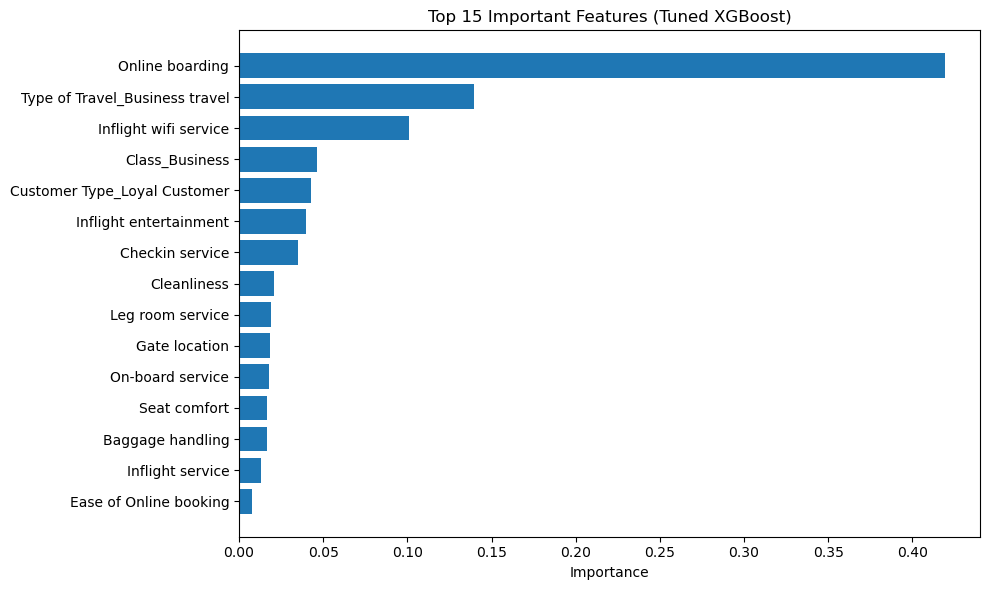

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 7: Access the best XGBoost model
best_model = grid_search.best_estimator_.named_steps['classifier']

# Step 8: Get preprocessed feature names
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if transformer == 'drop':
        continue
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(cols))
    else:
        feature_names.extend(cols)

# Step 9: Extract and sort feature importances
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Step 10: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features (Tuned XGBoost)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


Conclusion


The analysis identified several key features that had the most significant impact on predicting customer satisfaction. These include Online Boarding, Type of Travel – Business Travel, Inflight WiFi Service, Class – Business, and Customer Type – Loyal Customer. These findings are consistent with patterns observed in earlier data visualizations, reinforcing their influence on overall satisfaction ratings.

For future improvements, it could help to focus on collecting more data from underrepresented groups such as Disloyal Customers and those traveling in Eco Plus class to address current imbalances in the dataset. Enhancing the representation of these segments will help reduce model bias and improve the generalizability of insights across all customer types.

Overall, while the model performs well, balancing the dataset and refining feature selection based on further data collection will be key to driving more equitable and accurate predictions.